In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import cufflinks as cf
import warnings
import itertools
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import statsmodels.api as sm
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'


data1=pd.read_csv("Data_2017.csv")
data2=pd.read_csv("Data_2018.csv")
data3=pd.read_csv("Data_2019.csv")
data4=pd.read_csv("Data_2020.csv")
data5=pd.read_csv("Data_PM_2017.csv")
data6=pd.read_csv("Data_PM_2018.csv")
data7=pd.read_csv("Data_PM_2019.csv")
p_id1=data1['pollutant_id'].to_list()
date1=data1['date_time'].to_list()
p_value1=data1['pollutant_value'].to_list()
s_code1=data1['station_code'].to_list()

p_id2=data2['pollutant_id'].to_list()
date2=data2['date_time'].to_list()
p_value2=data2['pollutant_value'].to_list()
s_code2=data2['station_code'].to_list()


p_id3=data3['pollutant_id'].to_list()
date3=data3['date_time'].to_list()
p_value3=data3['pollutant_value'].to_list()
s_code3=data3['station_code'].to_list()

p_id4=data4['pollutant_id'].to_list()
date4=data4['date_time'].to_list()
p_value4=data4['pollutant_value'].to_list()


p_id=p_id1+p_id2+p_id3
date=date1+date2+date3
p_value=p_value1+p_value2+p_value3
s_code=s_code1+s_code2+s_code3

#Particulate matter
p_id5=data5['Pollutant_Id'].to_list()
#date5=data5['date_time'].to_list()
p_value5=data5['Pollutant_Value'].to_list()
s_code5=data5['Station_code'].to_list()

p_id6=data6['pollutant_id'].to_list()
#date6=data6['date_time'].to_list()
p_value6=data6['pollutant_value'].to_list()
s_code6=data6['station_code'].to_list()


p_id7=data7['pollutant_id'].to_list()
#date7=data7['date_time'].to_list()
p_value7=data7['pollutant_value'].to_list()
s_code7=data7['station_code'].to_list()

P_id=p_id5+p_id6+p_id7
P_value=p_value5+p_value6+p_value7
S_code=s_code5+s_code6+s_code7

 ##  NICOSIA TRAFFIC

In [4]:
date_NT=[date[i] for i in range(len(p_id)) if p_id[i]==6 and s_code[i]==1]
NO_2=[p_value[i] for i in range(len(p_id)) if p_id[i]==2 and  s_code[i]==1]
SO_2=[p_value[i] for i in range(len(p_id)) if(p_id[i]==4 and s_code[i]==1)]
O_3=[p_value[i] for i in range(len(p_id)) if(p_id[i]==5 and s_code[i]==1)]
CO=[p_value[i] for i in range(len(p_id)) if(p_id[i]==6 and s_code[i]==1)]
for i in range(len(CO)):
    if (CO[i]=='BDL'):
        CO[i]='nan'
    elif NO_2[i]=='BDL':
        NO_2[i]='nan'
    elif SO_2[i]=='BDL':
        SO_2[i]='nan'
    elif O_3[i]=="BDL":
        O_3[i]='nan'
    else:
        pass

for i in range(len(CO)):
    if (CO[i]=='nan'):
        CO[i]='0'
    elif SO_2[i]=='nan':
        SO_2[i]='0'
    elif NO_2[i]=='nan':
        NO_2[i]='0'
    elif O_3[i]=='nan':
        O_3[i]='0'
    else:
        pass
    
for i in range(len(SO_2)):
    if SO_2[i]=='BDL':
        SO_2[i]='nan'
for i in range(len(O_3)):
    if O_3[i]=='BDL':
        O_3[i]='nan'
for i in range(len(SO_2)):
    if (SO_2[i]=='nan'):
        SO_2[i]='0'
for i in range(len(O_3)):
    if (O_3[i]=='nan'):
        O_3[i]='0'
    
    
data_NT=[[date_NT[i],NO_2[i],SO_2[i],O_3[i], CO[i]] for i in range(len(date_NT))] 
data_NT= pd.DataFrame(data_NT, columns = ['Date','NO_2','SO_2','O_3', 'CO'])
data_NT["CO"] = pd.to_numeric(data_NT["CO"], downcast="float")
data_NT["NO_2"] = pd.to_numeric(data_NT["NO_2"], downcast="float")
data_NT["SO_2"] = pd.to_numeric(data_NT["SO_2"], downcast="float")
data_NT["O_3"] = pd.to_numeric(data_NT["O_3"], downcast="float")

column_mean1 = data_NT['CO'].mean()
column_mean2 = data_NT['NO_2'].mean()
column_mean3 = data_NT['SO_2'].mean()
column_mean4 = data_NT['O_3'].mean()

data_NT['CO'].fillna(column_mean1)
data_NT['NO_2'].fillna(column_mean2)
data_NT['SO_2'].fillna(column_mean3)
data_NT['O_3'].fillna(column_mean4)

data_NT['Date'] = pd.to_datetime(data_NT['Date'])
data_NT=data_NT.set_index('Date')
data_NT_O=data_NT

data_NT=data_NT.resample('D').mean()
#Nicosia Traffic
PM_2_5_NT=[P_value[i] for i in range(len(P_id)) if(P_id[i]==26 and S_code[i]==1)]
PM_10_NT=[P_value[i] for i in range(len(P_id)) if(P_id[i]==25 and S_code[i]==1)]
data_NT['PM_2.5']=PM_2_5_NT
data_NT['PM_10']=PM_10_NT
column_mean9 = data_NT['PM_2.5'].mean()
column_mean10 = data_NT['PM_10'].mean()

data_NT['PM_2.5'].fillna(column_mean9)
data_NT['PM_10'].fillna(column_mean10)
data_NT.head()


,NO_2,SO_2,O_3,CO,PM_2.5,PM_10
Date,,,,,,
2017-01-01,22.656250,1.409583,31.888332,632.104187,17.4,30.5
2017-01-02,53.323479,1.470435,34.365417,888.864807,16.1,21.1
2017-01-03,40.632275,2.226364,46.317081,535.313354,30.4,80.7
2017-01-04,20.976250,0.873750,77.764168,315.857483,35.1,86.3
2017-01-05,18.100000,3.159167,89.449165,270.007507,28.7,70.2


In [5]:
data_NT.describe()

,NO_2,SO_2,O_3,CO,PM_2.5,PM_10
count,1091.000000,1093.000000,1094.000000,1092.000000,1020.000000,1067.000000
mean,30.552916,2.724416,56.590080,503.460266,17.622353,43.386223
std,12.430579,1.524104,23.430660,236.155304,6.828044,28.948460
min,4.437500,0.111667,11.179167,161.383179,3.000000,10.600000
25%,20.973541,1.520833,35.293701,337.561981,13.000000,30.000000
50%,29.250000,2.521667,59.215401,418.735962,16.500000,37.500000
75%,39.214584,3.591667,76.068756,611.567383,20.800000,47.100000
max,75.320831,9.293750,110.616669,2130.129150,62.100000,569.700000


## NICOSIA RESIDENCE

In [6]:
date_NR=[date[i] for i in range(len(p_id)) if p_id[i]==6 and s_code[i]==2]
NO_2=[p_value[i] for i in range(len(p_id)) if p_id[i]==2 and  s_code[i]==2]
SO_2=[p_value[i] for i in range(len(p_id)) if(p_id[i]==4 and s_code[i]==2)]
O_3=[p_value[i] for i in range(len(p_id)) if(p_id[i]==5 and s_code[i]==2)]
CO=[p_value[i] for i in range(len(p_id)) if(p_id[i]==6 and s_code[i]==2)]
for i in range(len(CO)):
    if (CO[i]=='BDL'):
        CO[i]='nan'
    elif NO_2[i]=='BDL':
        NO_2[i]='nan'
    elif SO_2[i]=='BDL':
        SO_2[i]='nan'
    elif O_3[i]=="BDL":
        O_3[i]='nan'
    else:
        pass

for i in range(len(CO)):
    if (CO[i]=='nan'):
        CO[i]='0'
    elif SO_2[i]=='nan':
        SO_2[i]='0'
    elif NO_2[i]=='nan':
        NO_2[i]='0'
    elif O_3[i]=='nan':
        O_3[i]='0'
    else:
        pass
    
for i in range(len(SO_2)):
    if SO_2[i]=='BDL':
        SO_2[i]='nan'
for i in range(len(O_3)):
    if O_3[i]=='BDL':
        O_3[i]='nan'
for i in range(len(SO_2)):
    if (SO_2[i]=='nan'):
        SO_2[i]='0'
for i in range(len(O_3)):
    if (O_3[i]=='nan'):
        O_3[i]='0'
    
    
data_NR=[[date_NR[i],NO_2[i],SO_2[i],O_3[i], CO[i]] for i in range(len(date_NR))] 
data_NR= pd.DataFrame(data_NR, columns = ['Date','NO_2','SO_2','O_3', 'CO'])
data_NR["CO"] = pd.to_numeric(data_NR["CO"], downcast="float")
data_NR["NO_2"] = pd.to_numeric(data_NR["NO_2"], downcast="float")
data_NR["SO_2"] = pd.to_numeric(data_NR["SO_2"], downcast="float")
data_NR["O_3"] = pd.to_numeric(data_NR["O_3"], downcast="float")

column_mean5 = data_NR['CO'].mean()
column_mean6 = data_NR['NO_2'].mean()
column_mean7 = data_NR['SO_2'].mean()
column_mean8 = data_NR['O_3'].mean()

data_NR['CO'].fillna(column_mean5)
data_NR['NO_2'].fillna(column_mean6)
data_NR['SO_2'].fillna(column_mean7)
data_NR['O_3'].fillna(column_mean8)

data_NR['Date'] = pd.to_datetime(data_NR['Date'])
data_NR=data_NR.set_index('Date')
data_NR_O=data_NR
data_NR=data_NR.resample('D').mean()
PM_2_5_NR=[P_value[i] for i in range(len(P_id)) if(P_id[i]==26 and S_code[i]==2)]
PM_10_NR=[P_value[i] for i in range(len(P_id)) if(P_id[i]==25 and S_code[i]==2)]
data_NR['PM_2.5']=PM_2_5_NR
data_NR['PM_10']=PM_10_NR
column_mean11 = data_NR['PM_2.5'].mean()
column_mean12 = data_NR['PM_10'].mean()

data_NR['PM_2.5'].fillna(column_mean11)
data_NR['PM_10'].fillna(column_mean12)

data_NR.head()


,NO_2,SO_2,O_3,CO,PM_2.5,PM_10
Date,,,,,,
2017-01-01,22.525000,2.425000,35.771667,553.710815,16.3,26.7
2017-01-02,31.235834,3.890417,43.341667,629.263916,16.3,20.9
2017-01-03,22.701668,3.487917,56.488750,304.118683,17.9,32.1
2017-01-04,17.751667,2.367500,78.111252,299.715424,26.2,48.6
2017-01-05,11.007916,2.674167,101.402084,150.582916,24.6,44.5


In [7]:
data_NR.describe()

,NO_2,SO_2,O_3,CO,PM_2.5,PM_10
count,1091.000000,1093.000000,1094.000000,1090.000000,1022.000000,1032.000000
mean,21.873568,1.978501,68.560783,308.482452,14.992857,35.353973
std,11.902061,1.115598,23.170956,160.722107,6.087932,28.894236
min,4.245833,0.000000,15.056521,17.467501,1.700000,9.600000
25%,12.418188,1.220833,49.006149,198.868439,11.100000,24.800000
50%,18.887501,1.803333,69.943756,263.924561,14.200000,29.900000
75%,29.322292,2.504167,87.273094,377.548126,17.775000,36.900000
max,65.085716,7.175000,129.175003,1169.722534,78.100000,624.200000


## EMEP-Ayia Marina -Background

In [8]:
date_Z=[date[i] for i in range(len(p_id)) if p_id[i]==6 and s_code[i]==9]
NO_2=[p_value[i] for i in range(len(p_id)) if p_id[i]==2 and  s_code[i]==8]
SO_2=[p_value[i] for i in range(len(p_id)) if(p_id[i]==4 and s_code[i]==9)]
O_3=[p_value[i] for i in range(len(p_id)) if(p_id[i]==5 and s_code[i]==9)]
CO=[p_value[i] for i in range(len(p_id)) if(p_id[i]==6 and s_code[i]==9)]
for i in range(len(CO)):
    if (CO[i]=='BDL'):
        CO[i]='nan'
    elif NO_2[i]=='BDL':
        NO_2[i]='nan'
    elif SO_2[i]=='BDL':
        SO_2[i]='nan'
    elif O_3[i]=="BDL":
        O_3[i]='nan'
    else:
        pass

for i in range(len(CO)):
    if (CO[i]=='nan'):
        CO[i]='0'
    elif SO_2[i]=='nan':
        SO_2[i]='0'
    elif NO_2[i]=='nan':
        NO_2[i]='0'
    elif O_3[i]=='nan':
        O_3[i]='0'
    else:
        pass
    
for i in range(len(SO_2)):
    if SO_2[i]=='BDL':
        SO_2[i]='nan'
for i in range(len(O_3)):
    if O_3[i]=='BDL':
        O_3[i]='nan'
for i in range(len(SO_2)):
    if (SO_2[i]=='nan'):
        SO_2[i]='0'
for i in range(len(O_3)):
    if (O_3[i]=='nan'):
        O_3[i]='0'
    
    
data_Z=[[date_Z[i],NO_2[i],SO_2[i],O_3[i], CO[i]] for i in range(len(date_Z))] 
data_Z= pd.DataFrame(data_Z, columns = ['Date','NO_2','SO_2','O_3', 'CO'])
data_Z["CO"] = pd.to_numeric(data_Z["CO"], downcast="float")
data_Z["NO_2"] = pd.to_numeric(data_Z["NO_2"], downcast="float")
data_Z["SO_2"] = pd.to_numeric(data_Z["SO_2"], downcast="float")
data_Z["O_3"] = pd.to_numeric(data_Z["O_3"], downcast="float")

column_mean13 = data_Z['CO'].mean()
column_mean14 = data_Z['NO_2'].mean()
column_mean15 = data_Z['SO_2'].mean()
column_mean16 = data_Z['O_3'].mean()

data_Z['CO'].fillna(column_mean13)
data_Z['NO_2'].fillna(column_mean14)
data_Z['SO_2'].fillna(column_mean15)
data_Z['O_3'].fillna(column_mean16)
data_Z['Date'] = pd.to_datetime(data_Z['Date'])
data_Z=data_Z.set_index('Date')
data_Z_O=data_Z
data_Z=data_Z.resample('D').mean()
PM_2_5_Z=[P_value[i] for i in range(len(P_id)) if(P_id[i]==26 and S_code[i]==9)]
PM_10_Z=[P_value[i] for i in range(len(P_id)) if(P_id[i]==25 and S_code[i]==9)]
PM_10_Z[0]=6.9
data_Z['PM_2.5']=PM_2_5_Z
data_Z['PM_10']=PM_10_Z
column_mean17 = data_Z['PM_2.5'].mean()
column_mean18 = data_Z['PM_10'].mean()
PM_10_Z[0]=column_mean18
#data_Z['PM_2.5'].fillna(column_mean17)
#data_Z['PM_10'].fillna(column_mean18)

data_Z=data_Z.interpolate()
data_AM=data_Z
data_AM.head()


,NO_2,SO_2,O_3,CO,PM_2.5,PM_10
Date,,,,,,
2017-01-01,3.523750,0.750870,72.954094,177.931366,2.5,6.9
2017-01-02,7.679584,1.183333,84.351250,200.942917,2.7,5.8
2017-01-03,6.755455,2.286250,93.035004,118.492271,4.0,6.3
2017-01-04,6.279167,0.467083,92.485832,162.221664,3.3,5.1
2017-01-05,10.433333,1.863750,117.720001,157.161255,2.8,6.7


In [9]:
data_AM.describe()

,NO_2,SO_2,O_3,CO,PM_2.5,PM_10
count,1095.000000,1095.000000,1095.000000,1095.000000,1095.000000,1095.000000
mean,8.420279,1.170504,96.236687,157.305588,10.705205,21.843744
std,2.952318,0.962954,14.476766,28.529747,5.949673,19.841889
min,2.715000,0.000000,60.569565,82.362503,0.500000,3.000000
25%,6.381042,0.563333,85.797916,138.268333,6.875000,12.700000
50%,7.892917,0.966667,95.721115,153.547058,9.900000,17.800000
75%,9.839693,1.435000,106.540264,170.518753,13.400000,24.090000
max,26.083334,9.247827,144.033340,346.175018,71.000000,268.900000


## Data visualization and Analytics

Text(0, 0.5, ' CO concentration (μg/m^3)')

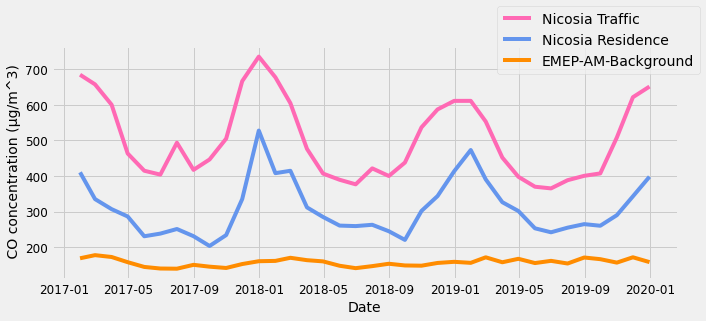

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
data_NT_by_month=data_NT.resample('M').mean()
data_NR_by_month=data_NR.resample('M').mean()
data_AM_by_month=data_AM.resample('M').mean()
fig= plt.figure(figsize=(10,4))
#colors = ['lightpink','pink','fuchsia','mistyrose','hotpink','deeppink','magenta']
sns.lineplot(x=data_NT_by_month.index,y='CO',data=data_NT_by_month,color='hotpink')
sns.lineplot(x=data_NR_by_month.index,y='CO',data=data_NR_by_month,color='cornflowerblue')
sns.lineplot(x=data_AM_by_month.index,y='CO',data=data_AM_by_month,color='darkorange')
plt.legend(['Nicosia Traffic', 'Nicosia Residence', 'EMEP-AM-Background'], loc = 2, bbox_to_anchor = (0.7,1.2))
plt.ylabel(' CO concentration (μg/m^3)')

Text(0, 0.5, '$NO_{2}$ Concentration (µg/m³)')

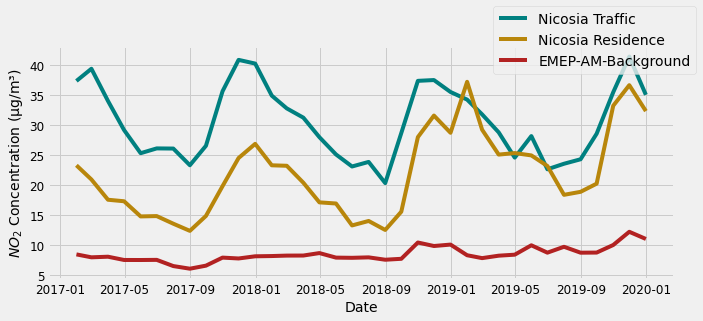

In [11]:
fig= plt.figure(figsize=(10,4))
#colors = ['lightpink','pink','fuchsia','mistyrose','hotpink','deeppink','magenta']
sns.lineplot(x=data_NT_by_month.index,y='NO_2',data=data_NT_by_month,color='teal')
sns.lineplot(x=data_NR_by_month.index,y='NO_2',data=data_NR_by_month,color='darkgoldenrod')
sns.lineplot(x=data_AM_by_month.index,y='NO_2',data=data_AM_by_month,color='firebrick')
plt.legend(['Nicosia Traffic', 'Nicosia Residence','EMEP-AM-Background'], loc = 2, bbox_to_anchor = (0.7,1.2))
plt.ylabel( r'$NO_{2}$'  + ' Concentration (µg/m³)')

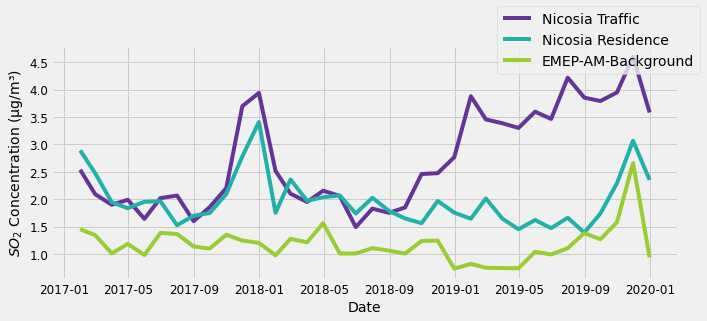

In [12]:
fig= plt.figure(figsize=(10,4))
#colors = ['lightpink','pink','fuchsia','mistyrose','hotpink','deeppink','magenta']
sns.lineplot(x=data_NT_by_month.index,y='SO_2',data=data_NT_by_month,color='rebeccapurple')
sns.lineplot(x=data_NR_by_month.index,y='SO_2',data=data_NR_by_month,color='lightseagreen')
sns.lineplot(x=data_AM_by_month.index,y='SO_2',data=data_AM_by_month,color='yellowgreen')
plt.legend(['Nicosia Traffic', 'Nicosia Residence','EMEP-AM-Background'],loc = 2, bbox_to_anchor = (0.7,1.2))
plt.ylabel( r'$SO_{2}$'  + ' Concentration (µg/m³)')
plt.show()

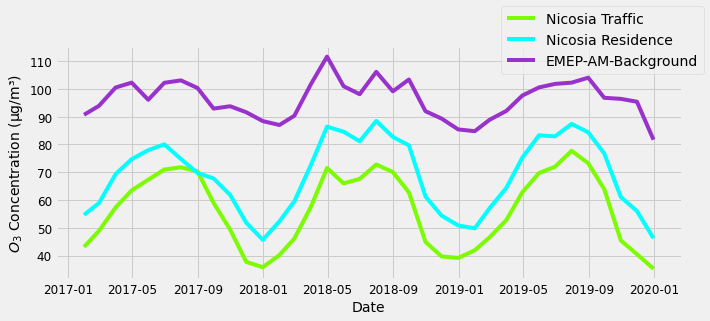

In [13]:
fig= plt.figure(figsize=(10,4))
#colors = ['lightpink','pink','fuchsia','mistyrose','hotpink','deeppink','magenta']
sns.lineplot(x=data_NT_by_month.index,y='O_3',data=data_NT_by_month,color='lawngreen')
sns.lineplot(x=data_NR_by_month.index,y='O_3',data=data_NR_by_month,color='cyan')
sns.lineplot(x=data_AM_by_month.index,y='O_3',data=data_AM_by_month,color='darkorchid')
plt.legend(['Nicosia Traffic', 'Nicosia Residence','EMEP-AM-Background'], loc = 2, bbox_to_anchor = (0.7,1.2))
plt.ylabel( r'$O_{3}$'  + ' Concentration (µg/m³)')
plt.show()

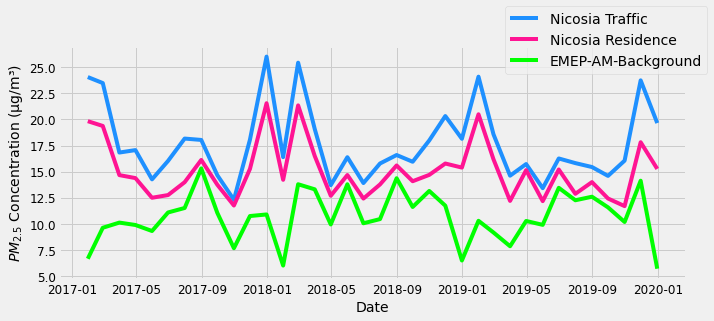

In [14]:
fig= plt.figure(figsize=(10,4))
#colors = ['lightpink','pink','fuchsia','mistyrose','hotpink','deeppink','magenta']
sns.lineplot(x=data_NT_by_month.index,y='PM_2.5',data=data_NT_by_month,color='dodgerblue')
sns.lineplot(x=data_NR_by_month.index,y='PM_2.5',data=data_NR_by_month,color='deeppink')
sns.lineplot(x=data_AM_by_month.index,y='PM_2.5',data=data_AM_by_month,color='lime')
plt.legend(['Nicosia Traffic', 'Nicosia Residence','EMEP-AM-Background'], loc = 2, bbox_to_anchor = (0.7,1.2))
plt.ylabel( r'$PM_{2.5}$'  + ' Concentration (µg/m³)')
plt.show()

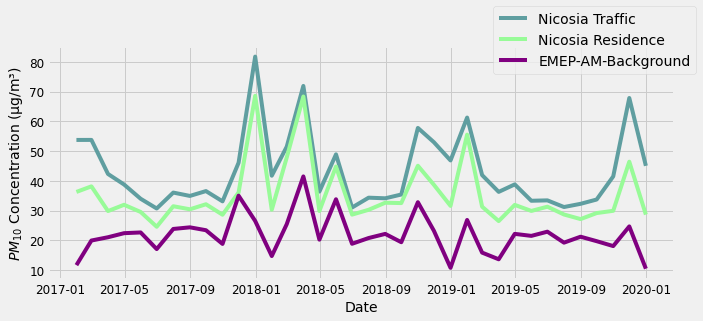

In [15]:
fig= plt.figure(figsize=(10,4))
#colors = ['lightpink','pink','fuchsia','mistyrose','hotpink','deeppink','magenta']
sns.lineplot(x=data_NT_by_month.index,y='PM_10',data=data_NT_by_month,color='cadetblue')
sns.lineplot(x=data_NR_by_month.index,y='PM_10',data=data_NR_by_month,color='palegreen')
sns.lineplot(x=data_AM_by_month.index,y='PM_10',data=data_AM_by_month,color='purple')
plt.legend(['Nicosia Traffic', 'Nicosia Residence','EMEP-AM-Background'], loc = 2, bbox_to_anchor = (0.7,1.2))
plt.ylabel( r'$PM_{10}$'  + ' Concentration (µg/m³)')
plt.show()

In [16]:
data_NT['Year']=data_NT.index.year
data_NT['Month']=data_NT.index.month
data_NT['Day_of_week']=data_NT.index.dayofweek
data_NT['Day']=data_NT.index.day
data_NT['Hour']=data_NT.index.hour
data_NT['Year']=data_NT.index.year
data_NT_O['Hour']=data_NT_O.index.hour

In [17]:
data_NR['Year']=data_NT.index.year
data_NR['Month']=data_NR.index.month
data_NR['Day_of_week']=data_NR.index.dayofweek
data_NR['Day']=data_NR.index.day
data_NR['Hour']=data_NR.index.hour
data_NR['Year']=data_NR.index.year
data_NR_O['Hour']=data_NR_O.index.hour

In [18]:
data_AM['Year']=data_NT.index.year
data_AM['Month']=data_AM.index.month
data_AM['Day_of_week']=data_AM.index.dayofweek
data_AM['Day']=data_AM.index.day
data_AM['Hour']=data_AM.index.hour
data_AM['Year']=data_AM.index.year
data_Z_O['Hour']=data_Z_O.index.hour

In [19]:
frames = [data_NT, data_NR, data_AM]
result = pd.concat(frames)
A=['Nicosia Traffic' for i in range(1095)]
B=['Nicosia Residence' for i in range(1095)]
C=['EMEP-AM-Background' for i in range(1095)]
D=A+B+C
result['Station']=D
#result.head()

In [20]:
frame = [data_NT_O, data_NR_O, data_Z_O]
original = pd.concat(frame)
E=['Nicosia Traffic' for i in range(26280)]
F=['Nicosia Residence' for i in range(26280)]
G=['EMEP-AM-Background' for i in range(26280)]
H=E+F+G
original['Station']=H
#original.head()

## Hourly Visualization

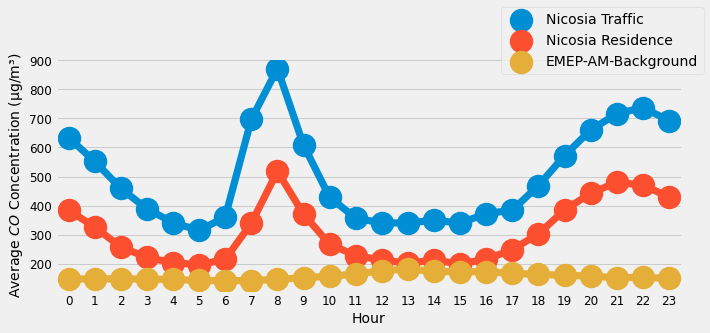

In [21]:
fig= plt.figure(figsize=(10,4))
sns.pointplot(x="Hour", y="CO", hue="Station", data=original,
              ci=None)
#plt.legend(['Nicosia Traffic', 'Nicosia Residence','EMEP-AM-Background'], loc = 2, bbox_to_anchor = (0.7,1.2))
plt.ylabel( 'Average ' + r'$CO_{}$'  + ' Concentration (µg/m³)')
plt.legend(loc = 2, bbox_to_anchor = (0.7,1.25))
plt.show()

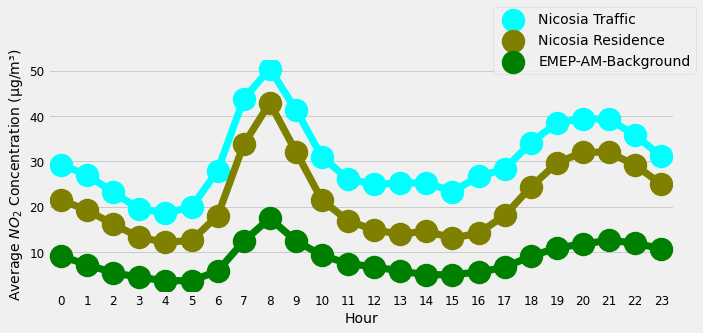

In [22]:
fig= plt.figure(figsize=(10,4))
sns.pointplot(x="Hour", y="NO_2", hue="Station", data=original,palette=['cyan','olive','green'],
              ci=None)
#plt.legend(['Nicosia Traffic', 'Nicosia Residence','EMEP-AM-Background'], loc = 2, bbox_to_anchor = (0.7,1.2))
plt.ylabel( 'Average ' + r'$NO_{2}$'  + ' Concentration (µg/m³)')
plt.legend(loc = 2, bbox_to_anchor = (0.7,1.25))
plt.show()

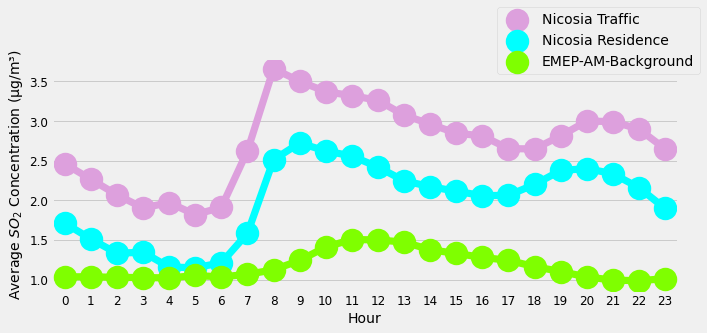

In [23]:
fig= plt.figure(figsize=(10,4))
sns.pointplot(x="Hour", y="SO_2", hue="Station", data=original,palette=['plum','aqua','chartreuse'],
              ci=None)
#plt.legend(['Nicosia Traffic', 'Nicosia Residence','EMEP-AM-Background'], loc = 2, bbox_to_anchor = (0.7,1.2))
plt.ylabel( 'Average ' + r'$SO_{2}$'  + ' Concentration (µg/m³)')
plt.legend(loc = 2, bbox_to_anchor = (0.7,1.25))
plt.show()

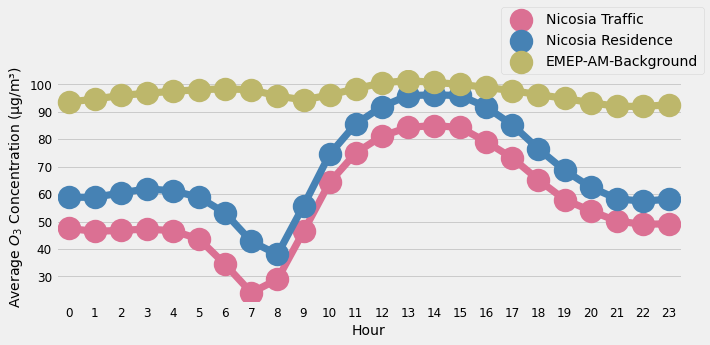

In [24]:
fig= plt.figure(figsize=(10,4))
sns.pointplot(x="Hour", y="O_3", hue="Station", data=original,palette=['palevioletred','steelblue','darkkhaki'],
              ci=None)
#plt.legend(['Nicosia Traffic', 'Nicosia Residence','EMEP-AM-Background'], loc = 2, bbox_to_anchor = (0.7,1.2))
plt.ylabel( 'Average ' + r'$O_{3}$'  + ' Concentration (µg/m³)')
plt.legend(loc = 2, bbox_to_anchor = (0.7,1.3))
plt.show()

## Day of Week visualization

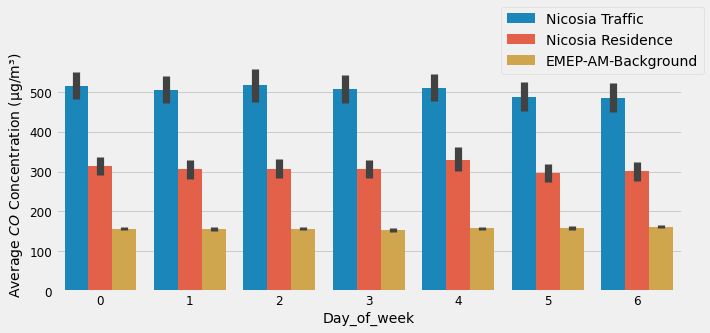

In [25]:
fig= plt.figure(figsize=(10,4))
sns.barplot(x="Day_of_week", y="CO", hue="Station", data=result)
#plt.legend(['Nicosia Traffic', 'Nicosia Residence','EMEP-AM-Background'], loc = 2, bbox_to_anchor = (0.7,1.2))
plt.ylabel( 'Average ' + r'$CO_{}$'  + ' Concentration (µg/m³)')
plt.legend(loc = 2, bbox_to_anchor = (0.7,1.25))
plt.show()

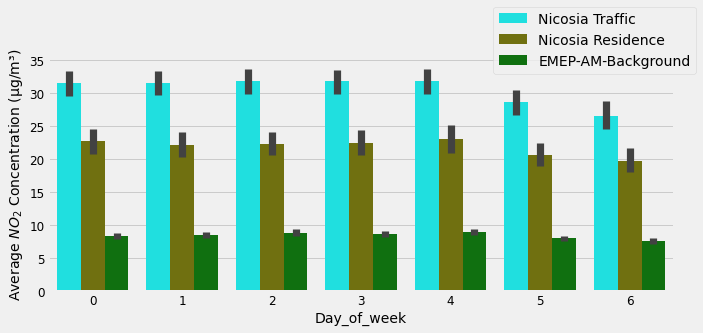

In [26]:
fig= plt.figure(figsize=(10,4))
sns.barplot(x="Day_of_week", y="NO_2", hue="Station", data=result, palette=['cyan','olive','green'])
#plt.legend(['Nicosia Traffic', 'Nicosia Residence','EMEP-AM-Background'], loc = 2, bbox_to_anchor = (0.7,1.2))
plt.ylabel( 'Average ' + r'$NO_{2}$'  + ' Concentration (µg/m³)')
plt.legend(loc = 2, bbox_to_anchor = (0.7,1.25))
plt.show()

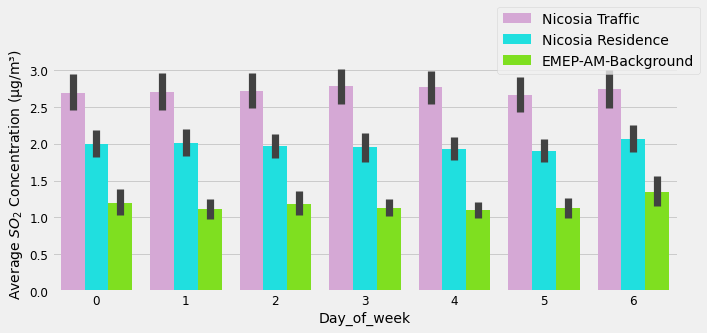

In [27]:
fig= plt.figure(figsize=(10,4))
sns.barplot(x="Day_of_week", y="SO_2", hue="Station", data=result, palette=['plum','aqua','chartreuse'])
#plt.legend(['Nicosia Traffic', 'Nicosia Residence','EMEP-AM-Background'], loc = 2, bbox_to_anchor = (0.7,1.2))
plt.ylabel( 'Average ' + r'$SO_{2}$'  + ' Concentration (µg/m³)')
plt.legend(loc = 2, bbox_to_anchor = (0.7,1.25))
plt.show()

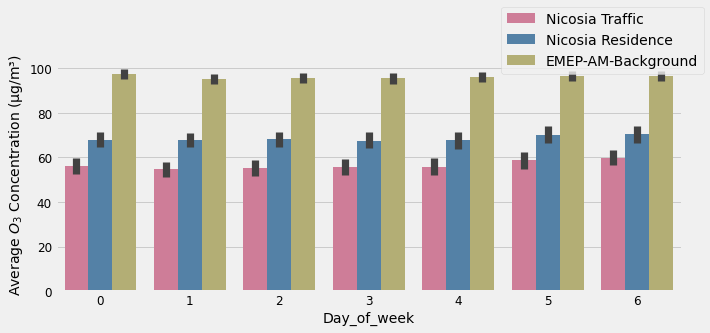

In [28]:
fig= plt.figure(figsize=(10,4))
sns.barplot(x="Day_of_week", y="O_3", hue="Station", data=result, palette=['palevioletred','steelblue','darkkhaki'])
#plt.legend(['Nicosia Traffic', 'Nicosia Residence','EMEP-AM-Background'], loc = 2, bbox_to_anchor = (0.7,1.2))
plt.ylabel( 'Average ' + r'$O_{3}$'  + ' Concentration (µg/m³)')
plt.legend(loc = 2, bbox_to_anchor = (0.7,1.25))
plt.show()

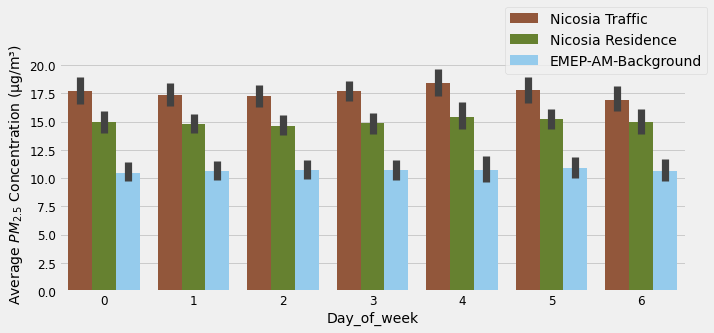

In [29]:
fig= plt.figure(figsize=(10,4))
sns.barplot(x="Day_of_week", y="PM_2.5", hue="Station", data=result, palette=['sienna','olivedrab','lightskyblue'])
#plt.legend(['Nicosia Traffic', 'Nicosia Residence','EMEP-AM-Background'], loc = 2, bbox_to_anchor = (0.7,1.2))
plt.ylabel( 'Average ' + r'$PM_{2.5}$'  + ' Concentration (µg/m³)')
plt.legend(loc = 2, bbox_to_anchor = (0.7,1.25))
plt.show()

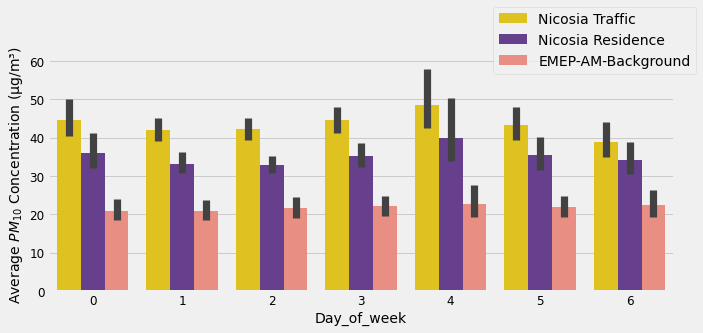

In [30]:
fig= plt.figure(figsize=(10,4))
sns.barplot(x="Day_of_week", y="PM_10", hue="Station", data=result, palette=['gold','rebeccapurple','salmon'])
#plt.legend(['Nicosia Traffic', 'Nicosia Residence','EMEP-AM-Background'], loc = 2, bbox_to_anchor = (0.7,1.2))
plt.ylabel( 'Average ' + r'$PM_{10}$'  + ' Concentration (µg/m³)')
plt.legend(loc = 2, bbox_to_anchor = (0.7,1.25))
plt.show()

## Monthly Visualization

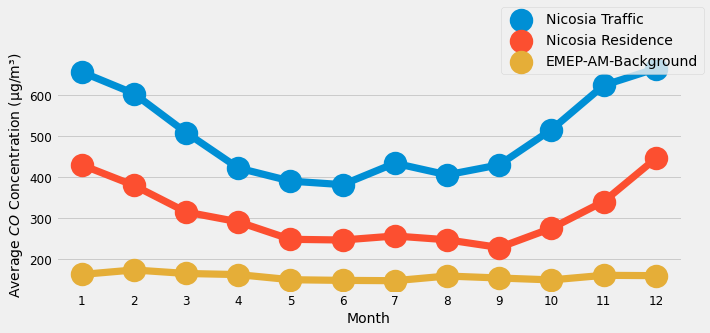

In [31]:
fig= plt.figure(figsize=(10,4))
sns.pointplot(x="Month", y="CO", hue="Station", data=result,
              ci=None)
#plt.legend(['Nicosia Traffic', 'Nicosia Residence','EMEP-AM-Background'], loc = 2, bbox_to_anchor = (0.7,1.2))
plt.ylabel( 'Average ' + r'$CO_{}$'  + ' Concentration (µg/m³)')
plt.legend(loc = 2, bbox_to_anchor = (0.7,1.25))
plt.show()

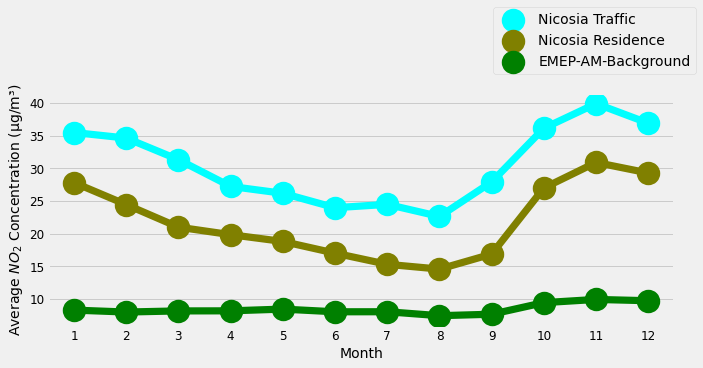

In [32]:
fig= plt.figure(figsize=(10,4))
sns.pointplot(x="Month", y="NO_2", hue="Station", data=result,palette=['cyan','olive','green'],
              ci=None)
#plt.legend(['Nicosia Traffic', 'Nicosia Residence','EMEP-AM-Background'], loc = 2, bbox_to_anchor = (0.7,1.2))
plt.ylabel( 'Average ' + r'$NO_{2}$'  + ' Concentration (µg/m³)')
plt.legend(loc = 2, bbox_to_anchor = (0.7,1.4))
plt.show()

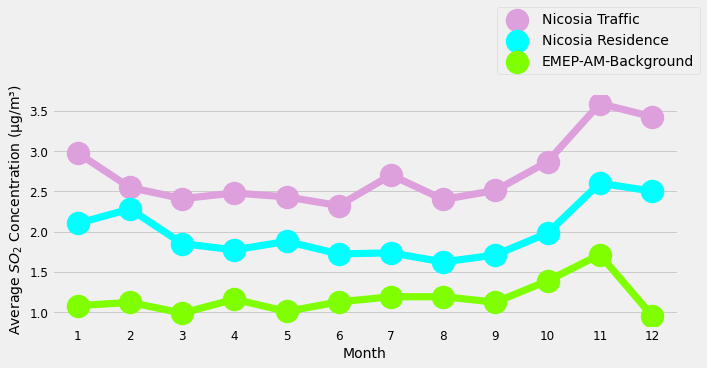

In [33]:
fig= plt.figure(figsize=(10,4))
sns.pointplot(x="Month", y="SO_2", hue="Station", data=result,palette=['plum','aqua','chartreuse'],
              ci=None)
#plt.legend(['Nicosia Traffic', 'Nicosia Residence','EMEP-AM-Background'], loc = 2, bbox_to_anchor = (0.7,1.2))
plt.ylabel( 'Average ' + r'$SO_{2}$'  + ' Concentration (µg/m³)')
plt.legend(loc = 2, bbox_to_anchor = (0.7,1.4))
plt.show()

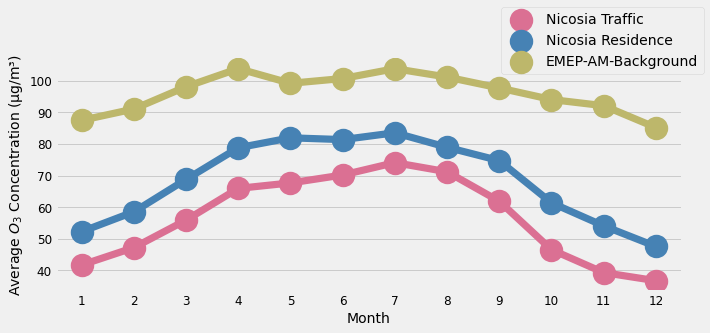

In [34]:
fig= plt.figure(figsize=(10,4))
sns.pointplot(x="Month", y="O_3", hue="Station", data=result,palette=['palevioletred','steelblue','darkkhaki'],
              ci=None)
#plt.legend(['Nicosia Traffic', 'Nicosia Residence','EMEP-AM-Background'], loc = 2, bbox_to_anchor = (0.7,1.2))
plt.ylabel( 'Average ' + r'$O_{3}$'  + ' Concentration (µg/m³)')
plt.legend(loc = 2, bbox_to_anchor = (0.7,1.25))
plt.show()

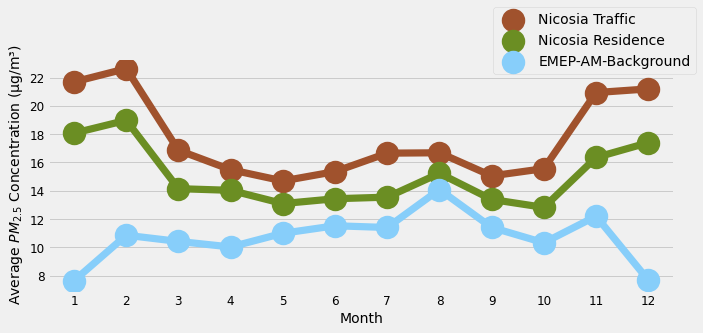

In [35]:
fig= plt.figure(figsize=(10,4))
sns.pointplot(x="Month", y="PM_2.5", hue="Station", data=result,palette=['sienna','olivedrab','lightskyblue'],
              ci=None)
#plt.legend(['Nicosia Traffic', 'Nicosia Residence','EMEP-AM-Background'], loc = 2, bbox_to_anchor = (0.7,1.2))
plt.ylabel( 'Average ' + r'$PM_{2.5}$'  + ' Concentration (µg/m³)')
plt.legend(loc = 2, bbox_to_anchor = (0.7,1.25))
plt.show()

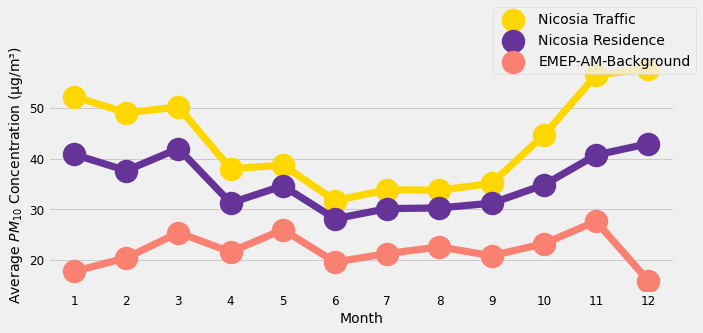

In [36]:
fig= plt.figure(figsize=(10,4))
sns.pointplot(x="Month", y="PM_10", hue="Station", data=result,palette=['gold','rebeccapurple','salmon'],
              ci=None)
#plt.legend(['Nicosia Traffic', 'Nicosia Residence','EMEP-AM-Background'], loc = 2, bbox_to_anchor = (0.7,1.2))
plt.ylabel( 'Average ' + r'$PM_{10}$'  + ' Concentration (µg/m³)')
plt.legend(loc = 2, bbox_to_anchor = (0.7,1.25))
plt.show()

<AxesSubplot:>

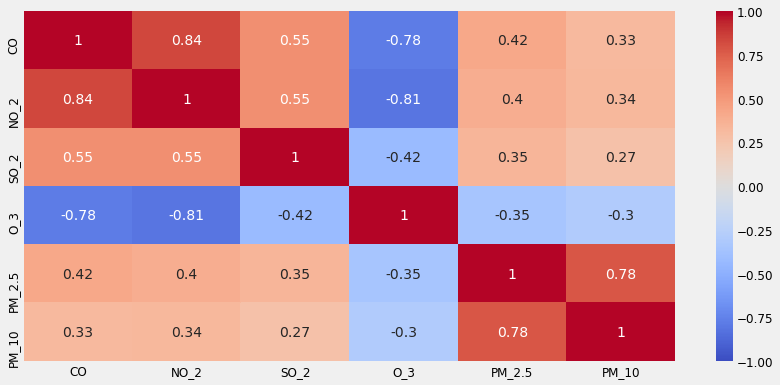

In [37]:
fig= plt.figure(figsize=(13,6))
sns.heatmap(result[['CO','NO_2','SO_2','O_3','PM_2.5','PM_10']].corr(), annot = True, vmin=-1, vmax=1, 
            center= 0, cmap= 'coolwarm')


## AQI Nicosia Traffic

In [38]:
NO_2=data_NT['NO_2'].to_list()
I_NO_2=[]
for i in range(len(NO_2)):
    if NO_2[i]>=0 and NO_2[i]<=50:
        I=((25-0)/(50-0))*(NO_2[i]-0)+0
    elif NO_2[i]>=51 and NO_2[i]<=100:
        I=((50-25)/(100-50))*(NO_2[i]-50)+25
    elif NO_2[i]>=101 and NO_2[i]<=200:
        I=((75-50)/(200-100))*(NO_2[i]-100)+50
    elif NO_2[i]>=201 and NO_2[i]<=400:
        I=((100-75)/(400-200))*(NO_2[i]-200)+75
    else:
        I=101
    I_NO_2.append(I)

In [39]:
O_3=data_NT['O_3'].to_list()
I_O_3=[]
for i in range(len(O_3)):
    if O_3[i]>=0 and O_3[i]<=60:
        I=((25-0)/(60-0))*(O_3[i]-0)+0
    elif O_3[i]>=61 and O_3[i]<=120:
        I=((50-25)/(120-60))*(O_3[i]-60)+25
    elif O_3[i]>=121 and O_3[i]<=180:
        I=((75-50)/(180-120))*(O_3[i]-120)+50
    elif O_3[i]>=181 and O_3[i]<=240:
        I=((100-75)/(240-180))*(O_3[i]-180)+75
    else:
        I=101
    I_O_3.append(I)
len(I_O_3)

1095

In [40]:
PM_2_5=data_NT['PM_2.5'].to_list()
I_PM_2_5=[]
for i in range(len(PM_2_5)):
    if PM_2_5[i]>=0 and PM_2_5[i]<=15:
        I=((25-0)/(15-0))*(PM_2_5[i]-0)+0
    elif PM_2_5[i]>=16 and PM_2_5[i]<=30:
        I=((50-25)/(30-15))*(PM_2_5[i]-15)+25
    elif PM_2_5[i]>=31 and PM_2_5[i]<=55:
        I=((75-50)/(55-30))*(PM_2_5[i]-30)+50
    elif PM_2_5[i]>=56 and PM_2_5[i]<=110:
        I=((100-75)/(110-55))*(PM_2_5[i]-55)+75
    else:
        I=101
    I_PM_2_5.append(I)
    
len(I_PM_2_5)

1095

In [41]:
PM_10=data_NT['PM_10'].to_list()
I_PM_10=[]
for i in range(len(PM_10)):
    if PM_10[i]>=0 and PM_10[i]<=25:
        I=((25-0)/(25-0))*(PM_10[i]-0)+0
    elif PM_10[i]>=26 and PM_10[i]<=50:
        I=((50-25)/(50-25))*(PM_10[i]-25)+25
    elif PM_10[i]>=51 and PM_10[i]<=90:
        I=((75-50)/(90-50))*(PM_10[i]-50)+50
    elif PM_10[i]>=91 and PM_10[i]<=180:
        I=((100-75)/(180-90))*(PM_10[i]-90)+75
    else:
        I=101
    I_PM_10.append(I)

In [42]:
l=[[I_NO_2[i],I_O_3[i],I_PM_2_5[i],I_PM_10[i]] for i in range(1095)]
AQI=[np.round(max(l[i]),2) for i in range(1095)]
l_pollution=[]
for i in range(len(AQI)):
    if AQI[i]>=0 and AQI[i]<=50:
        l_pollution.append('Good')
    elif AQI[i]>=51 and AQI[i]<=75:
        l_pollution.append('Moderate')
    else:
        l_pollution.append('Unhealthy') 
    
data_NT['AQI']=AQI
data_NT['Pollution Level']=l_pollution
data_NT.head()

,NO_2,SO_2,O_3,CO,PM_2.5,PM_10,Year,Month,Day_of_week,Day,Hour,AQI,Pollution Level
Date,,,,,,,,,,,,,
2017-01-01,22.656250,1.409583,31.888332,632.104187,17.4,30.5,2017,1,6,1,0,30.50,Good
2017-01-02,53.323479,1.470435,34.365417,888.864807,16.1,21.1,2017,1,0,2,0,26.83,Good
2017-01-03,40.632275,2.226364,46.317081,535.313354,30.4,80.7,2017,1,1,3,0,101.00,Unhealthy
2017-01-04,20.976250,0.873750,77.764168,315.857483,35.1,86.3,2017,1,2,4,0,72.69,Moderate
2017-01-05,18.100000,3.159167,89.449165,270.007507,28.7,70.2,2017,1,3,5,0,62.62,Moderate


## AQI Nicosia Residence

In [43]:
NO_2=data_NR['NO_2'].to_list()
I_NO_2=[]
for i in range(len(NO_2)):
    if NO_2[i]>=0 and NO_2[i]<=50:
        I=((25-0)/(50-0))*(NO_2[i]-0)+0
    elif NO_2[i]>=51 and NO_2[i]<=100:
        I=((50-25)/(100-50))*(NO_2[i]-50)+25
    elif NO_2[i]>=101 and NO_2[i]<=200:
        I=((75-50)/(200-100))*(NO_2[i]-100)+50
    elif NO_2[i]>=201 and NO_2[i]<=400:
        I=((100-75)/(400-200))*(NO_2[i]-200)+75
    else:
        I=101
    I_NO_2.append(I)


In [44]:
O_3=data_NR['O_3'].to_list()
I_O_3=[]
for i in range(len(O_3)):
    if O_3[i]>=0 and O_3[i]<=60:
        I=((25-0)/(60-0))*(O_3[i]-0)+0
    elif O_3[i]>=61 and O_3[i]<=120:
        I=((50-25)/(120-60))*(O_3[i]-60)+25
    elif O_3[i]>=121 and O_3[i]<=180:
        I=((75-50)/(180-120))*(O_3[i]-120)+50
    elif O_3[i]>=181 and O_3[i]<=240:
        I=((100-75)/(240-180))*(O_3[i]-180)+75
    else:
        I=101
    I_O_3.append(I)

In [45]:
PM_2_5=data_NR['PM_2.5'].to_list()
I_PM_2_5=[]
for i in range(len(PM_2_5)):
    if PM_2_5[i]>=0 and PM_2_5[i]<=15:
        I=((25-0)/(15-0))*(PM_2_5[i]-0)+0
    elif PM_2_5[i]>=16 and PM_2_5[i]<=30:
        I=((50-25)/(30-15))*(PM_2_5[i]-15)+25
    elif PM_2_5[i]>=31 and PM_2_5[i]<=55:
        I=((75-50)/(55-30))*(PM_2_5[i]-30)+50
    elif PM_2_5[i]>=56 and PM_2_5[i]<=110:
        I=((100-75)/(110-55))*(PM_2_5[i]-55)+75
    else:
        I=101
    I_PM_2_5.append(I)

In [46]:
PM_10=data_NR['PM_10'].to_list()
I_PM_10=[]
for i in range(len(PM_10)):
    if PM_10[i]>=0 and PM_10[i]<=25:
        I=((25-0)/(25-0))*(PM_10[i]-0)+0
    elif PM_10[i]>=26 and PM_10[i]<=50:
        I=((50-25)/(50-25))*(PM_10[i]-25)+25
    elif PM_10[i]>=51 and PM_10[i]<=90:
        I=((75-50)/(90-50))*(PM_10[i]-50)+50
    elif PM_10[i]>=91 and PM_10[i]<=180:
        I=((100-75)/(180-90))*(PM_10[i]-90)+75
    else:
        I=101
    I_PM_10.append(I)

In [47]:
l=[[I_NO_2[i],I_O_3[i],I_PM_2_5[i],I_PM_10[i]] for i in range(1095)]
AQI=[np.round(max(l[i]),2) for i in range(1095)]
l_pollution=[]
for i in range(len(AQI)):
    if AQI[i]>=0 and AQI[i]<=50:
        l_pollution.append('Good')
    elif AQI[i]>=51 and AQI[i]<=75:
        l_pollution.append('Moderate')
    else:
        l_pollution.append('Unhealthy') 
        
data_NR['AQI']=AQI
data_NR['Pollution Level']=l_pollution
data_NR.head()

,NO_2,SO_2,O_3,CO,PM_2.5,PM_10,Year,Month,Day_of_week,Day,Hour,AQI,Pollution Level
Date,,,,,,,,,,,,,
2017-01-01,22.525000,2.425000,35.771667,553.710815,16.3,26.7,2017,1,6,1,0,27.17,Good
2017-01-02,31.235834,3.890417,43.341667,629.263916,16.3,20.9,2017,1,0,2,0,27.17,Good
2017-01-03,22.701668,3.487917,56.488750,304.118683,17.9,32.1,2017,1,1,3,0,32.10,Good
2017-01-04,17.751667,2.367500,78.111252,299.715424,26.2,48.6,2017,1,2,4,0,48.60,Good
2017-01-05,11.007916,2.674167,101.402084,150.582916,24.6,44.5,2017,1,3,5,0,44.50,Good


## EMEP-AM-Background

In [48]:
NO_2=data_AM['NO_2'].to_list()
I_NO_2=[]
for i in range(len(NO_2)):
    if NO_2[i]>=0 and NO_2[i]<=50:
        I=((25-0)/(50-0))*(NO_2[i]-0)+0
    elif NO_2[i]>=51 and NO_2[i]<=100:
        I=((50-25)/(100-50))*(NO_2[i]-50)+25
    elif NO_2[i]>=101 and NO_2[i]<=200:
        I=((75-50)/(200-100))*(NO_2[i]-100)+50
    elif NO_2[i]>=201 and NO_2[i]<=400:
        I=((100-75)/(400-200))*(NO_2[i]-200)+75
    else:
        I=101
    I_NO_2.append(I)


In [49]:
O_3=data_AM['O_3'].to_list()
I_O_3=[]
for i in range(len(O_3)):
    if O_3[i]>=0 and O_3[i]<=60:
        I=((25-0)/(60-0))*(O_3[i]-0)+0
    elif O_3[i]>=61 and O_3[i]<=120:
        I=((50-25)/(120-60))*(O_3[i]-60)+25
    elif O_3[i]>=121 and O_3[i]<=180:
        I=((75-50)/(180-120))*(O_3[i]-120)+50
    elif O_3[i]>=181 and O_3[i]<=240:
        I=((100-75)/(240-180))*(O_3[i]-180)+75
    else:
        I=101
    I_O_3.append(I)

In [50]:
PM_2_5=data_AM['PM_2.5'].to_list()
I_PM_2_5=[]
for i in range(len(PM_2_5)):
    if PM_2_5[i]>=0 and PM_2_5[i]<=15:
        I=((25-0)/(15-0))*(PM_2_5[i]-0)+0
    elif PM_2_5[i]>=16 and PM_2_5[i]<=30:
        I=((50-25)/(30-15))*(PM_2_5[i]-15)+25
    elif PM_2_5[i]>=31 and PM_2_5[i]<=55:
        I=((75-50)/(55-30))*(PM_2_5[i]-30)+50
    elif PM_2_5[i]>=56 and PM_2_5[i]<=110:
        I=((100-75)/(110-55))*(PM_2_5[i]-55)+75
    else:
        I=101
    I_PM_2_5.append(I)

In [51]:
PM_10=data_AM['PM_10'].to_list()
I_PM_10=[]
for i in range(len(PM_10)):
    if PM_10[i]>=0 and PM_10[i]<=25:
        I=((25-0)/(25-0))*(PM_10[i]-0)+0
    elif PM_10[i]>=26 and PM_10[i]<=50:
        I=((50-25)/(50-25))*(PM_10[i]-25)+25
    elif PM_10[i]>=51 and PM_10[i]<=90:
        I=((75-50)/(90-50))*(PM_10[i]-50)+50
    elif PM_10[i]>=91 and PM_10[i]<=180:
        I=((100-75)/(180-90))*(PM_10[i]-90)+75
    else:
        I=101
    I_PM_10.append(I)

In [52]:
l=[[I_NO_2[i],I_O_3[i],I_PM_2_5[i],I_PM_10[i]] for i in range(1095)]
AQI=[np.round(max(l[i]),2) for i in range(1095)]
l_pollution=[]
for i in range(len(AQI)):
    if AQI[i]>=0 and AQI[i]<=50:
        l_pollution.append('Good')
    elif AQI[i]>=51 and AQI[i]<=75:
        l_pollution.append('Moderate')
    else:
        l_pollution.append('Unhealthy')   
data_AM['AQI']=AQI
data_AM['Pollution Level']=l_pollution
data_AM.head()

,NO_2,SO_2,O_3,CO,PM_2.5,PM_10,Year,Month,Day_of_week,Day,Hour,AQI,Pollution Level
Date,,,,,,,,,,,,,
2017-01-01,3.523750,0.750870,72.954094,177.931366,2.5,6.9,2017,1,6,1,0,30.40,Good
2017-01-02,7.679584,1.183333,84.351250,200.942917,2.7,5.8,2017,1,0,2,0,35.15,Good
2017-01-03,6.755455,2.286250,93.035004,118.492271,4.0,6.3,2017,1,1,3,0,38.76,Good
2017-01-04,6.279167,0.467083,92.485832,162.221664,3.3,5.1,2017,1,2,4,0,38.54,Good
2017-01-05,10.433333,1.863750,117.720001,157.161255,2.8,6.7,2017,1,3,5,0,49.05,Good


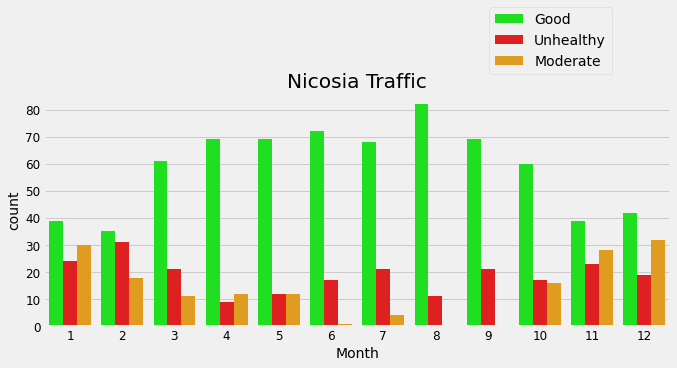

In [53]:
fig= plt.figure(figsize=(10,4))
sns.countplot(x = 'Month', data = data_NT,hue='Pollution Level',palette=['lime','red','orange'])
plt.legend(loc = 2, bbox_to_anchor = (0.7,1.4))
plt.title('Nicosia Traffic')
plt.show()

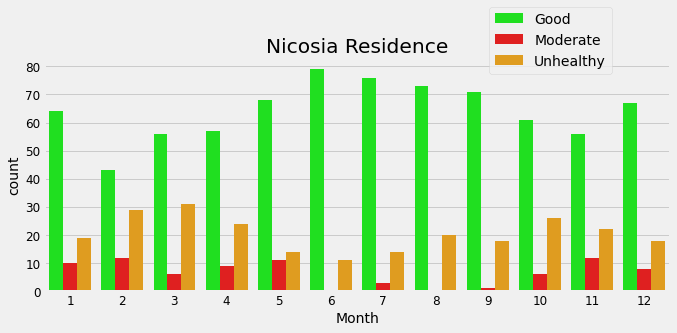

In [54]:
fig= plt.figure(figsize=(10,4))
sns.countplot(x = 'Month', data = data_NR,hue='Pollution Level',palette=['lime','red','orange'])
plt.legend(loc = 2, bbox_to_anchor = (0.7,1.25))
plt.title('Nicosia Residence')
plt.show()

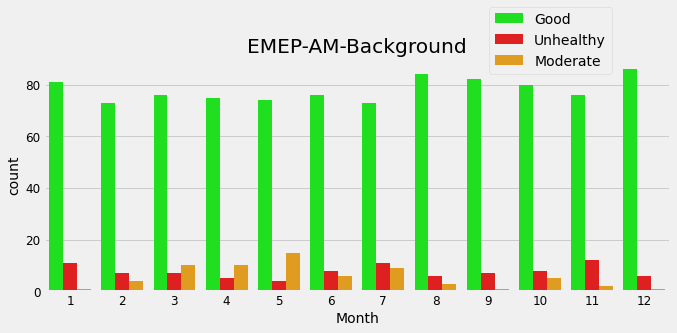

In [55]:
fig= plt.figure(figsize=(10,4))
sns.countplot(x = 'Month', data = data_AM,hue='Pollution Level',palette=['lime','red','orange'])
plt.legend(loc = 2, bbox_to_anchor = (0.7,1.25))
plt.title('EMEP-AM-Background')
plt.show()

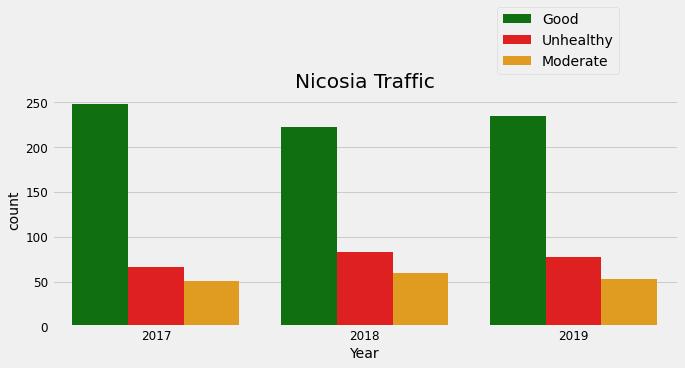

In [56]:
fig= plt.figure(figsize=(10,4))
sns.countplot(x = 'Year', data = data_NT,hue='Pollution Level',palette=['green','red','orange'])
plt.legend(loc = 2, bbox_to_anchor = (0.7,1.4))
plt.title('Nicosia Traffic')
plt.show()

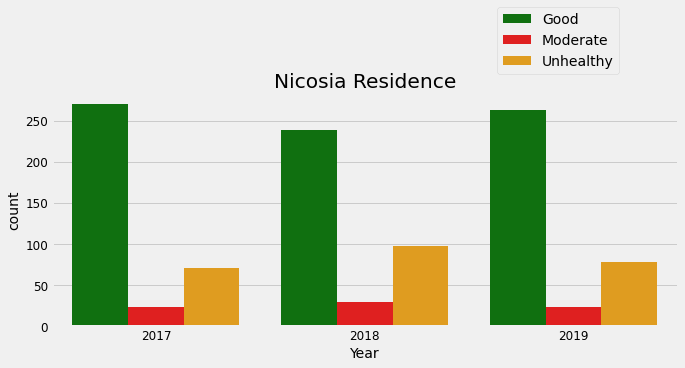

In [57]:
fig= plt.figure(figsize=(10,4))
sns.countplot(x = 'Year', data = data_NR,hue='Pollution Level',palette=['green','red','orange'])
plt.legend(loc = 2, bbox_to_anchor = (0.7,1.4))
plt.title('Nicosia Residence')
plt.show()

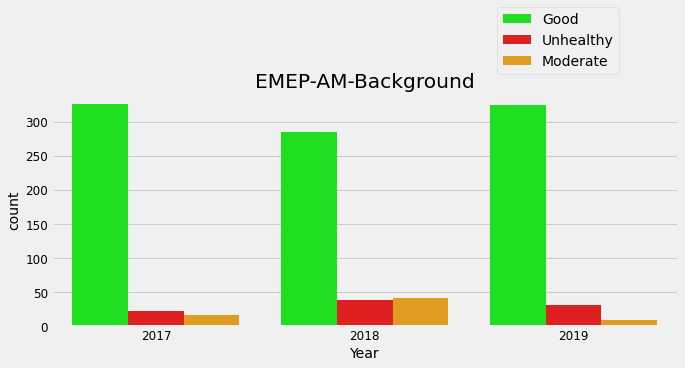

In [58]:
fig= plt.figure(figsize=(10,4))
sns.countplot(x = 'Year', data = data_AM,hue='Pollution Level',palette=['lime','red','orange'])
plt.legend(loc = 2, bbox_to_anchor = (0.7,1.4))
plt.title('EMEP-AM-Background')
plt.show()

In [59]:
import plotly.graph_objects as go
  
  
fig = go.Figure()
  
# Defining x axis
x = ['CO', 'CO', 'CO', 'PM', 'PM', 'PM']
  
fig.add_trace(go.Box(
  
    # defining y axis in corresponding
    # to x-axis
    y=[1, 2, 6, 4, 5, 6],
    x=x,
    name='A',
    marker_color='green'
))
  
fig.add_trace(go.Box(
    y=[2, 3, 4, 1, 2, 6],
    x=x,
    name='B',
    marker_color='yellow'
))
  
fig.add_trace(go.Box(
    y=[2, 5, 6, 7, 8, 1],
    x=x,
    name='C',
    marker_color='blue'
))
  
fig.update_layout(
  
    # group together boxes of the different
    # traces for each value of x
    boxmode='group'
)
fig.show()

In [108]:
import plotly.graph_objects as go
def scaler(x):
    A=np.array(x)
    A=(A-min(A))/(max(A)-min(A))
    A=list(A)
    return A
    

NO_2_NT=scaler(data_NT['NO_2'].to_list())
SO_2_NT=scaler(data_NT['SO_2'].to_list())
CO_NT=scaler(data_NT['CO'].to_list())
O_3_NT=scaler(data_NT['O_3'].to_list())
PM_2_5_NT=scaler(data_NT['PM_2.5'].to_list())
PM_10_NT=scaler(data_NT['PM_10'].to_list())


NO_2_NR=scaler(data_NR['NO_2'].to_list())
SO_2_NR=scaler(data_NR['SO_2'].to_list())
CO_NR=scaler(data_NR['CO'].to_list())
O_3_NR=scaler(data_NR['O_3'].to_list())
PM_2_5_NR=scaler(data_NR['PM_2.5'].to_list())
PM_10_NR=scaler(data_NR['PM_10'].to_list())

NO_2_AM=scaler(data_AM['NO_2'].to_list())
SO_2_AM=scaler(data_AM['SO_2'].to_list())
CO_AM=scaler(data_AM['CO'].to_list())
O_3_AM=scaler(data_AM['O_3'].to_list())
PM_2_5_AM=scaler(data_AM['PM_2.5'].to_list())
PM_10_AM=scaler(data_AM['PM_10'].to_list())

L_NT=NO_2_NT+SO_2_NT+CO_NT+O_3_NT+PM_2_5_NT+PM_10_NT
L_NR=NO_2_NR+SO_2_NR+CO_NR+O_3_NR+PM_2_5_NR+PM_10_NR
L_AM=NO_2_AM+SO_2_AM+CO_AM+O_3_AM+PM_2_5_AM+PM_10_AM


x1=['NO_2' for i in range(1095)]
x2=['SO_2' for i in range(1095)]
x3=['CO' for i in range(1095)]
x4=['O_3' for i in range(1095)]
x5=['PM_2.5' for i in range(1095)]
x6=['PM_10' for i in range(1095)]
x=x1+x2+x3+x4+x5+x6

fig = go.Figure()  
# Defining x axis
x = x

fig.add_trace(go.Box(
  
    # defining y axis in corresponding
    # to x-axis
    y=L_NT,
    x=x,
    name='Nicosia Traffic',
    marker_color='blue'
))
  
fig.add_trace(go.Box(
    y=L_NR,
    x=x,
    name='Nicosia Residence',
    marker_color='lime'
))
  
fig.add_trace(go.Box(
    y=L_AM,
    x=x,
    name='EMEP-AM Background',
    marker_color='sienna'

))
  
fig.update_layout(
  
    # group together boxes of the different
    # traces for each value of x
    boxmode='group'
)

fig.update_xaxes(title_text="Pollutants")
fig.update_yaxes(title_text="Normalized Concentrations")
fig.show()

